### 과정
- 데이터의 특정 영역을 대표하는 클러스터의 중심(cluster center)을 찾는다.
- 데이터 포인터(샘플, 행, 레코드)를 가장 가까운 클러스터 중심에 할당
- 새로 할당된 포인트를 포함한 평균값으로 클러스터 중심을 다시 지정
- 클러스에 할당되는 데이터 포인터에 변화가 없을 때까지 작업을 반복

In [3]:
# import pandas as pd
from sklearn import  datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

정규분포 이용해 가상의 데이터 생성

In [4]:
# 1. make_blobs toy data
X, y = datasets.make_blobs(random_state=1)

kmeans = KMeans(n_clusters = 3)  # 3개
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
# 2. check labels
kmeans.labels_ # fit에서 반환한 라벨 (모델마다 반환하는것이 다름)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [6]:
# 3. X.predict
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

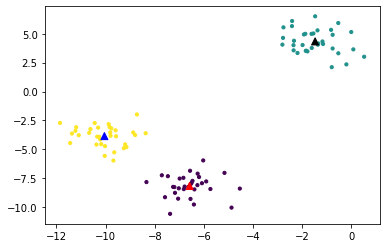

In [10]:
# 4. scatter graph
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', s=10)  # c=color, s=size
plt.scatter(kmeans.cluster_centers_[:, 0],   # 군집의 중심점
            kmeans.cluster_centers_[:, 1],
            c=['r','k','b'], marker='^', s=50)
plt.show()

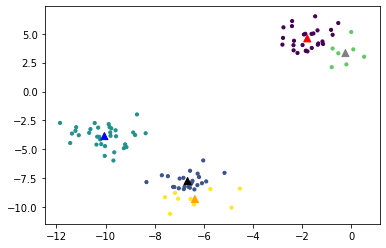

In [12]:
# 5. k=5
kmeans5 = KMeans(n_clusters = 5)  # 5개
kmeans5.fit(X)
assign = kmeans5.labels_          # assign 할당

plt.scatter(X[:, 0], X[:, 1], c=kmeans5.labels_, marker='o', s=10)  # c=color, s=size
plt.scatter(kmeans5.cluster_centers_[:, 0],   # 군집의 중심점
            kmeans5.cluster_centers_[:, 1],
            c=['r','k','b','gray','orange'], marker='^', s=50)
plt.show()

덴드로그램 -> 토너먼트 시각화
엘보우 그래프 -> 군집을 몇 개로 할것인지 시각화

### 병합 군집
- 시작할 때, 각각의 포인터 하나하나가 클러스터로 지정된다.
- 종료조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다.
- 사이킷런의 종료 조건은 클러스터의 개수
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정함
 + 연결법 : ward, average, complete
   (분산을 최소화하도록 / 포인트간 평균거리 짧은것 / 사이의 최대거리가 가장 짧은것)

- 계층적 클러스터링 : 군집 하나의 데이터 샘플을 하나의 클러스터로 보고
　　　　　　　　가장 유사도가 높은 클러스터를 합치면서 클러스터의 개수를 줄여 가는 방법

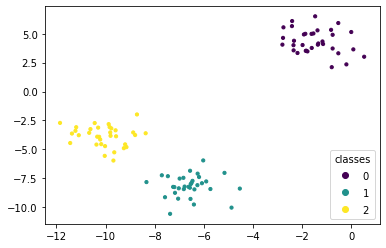

In [46]:
from sklearn.cluster import AgglomerativeClustering   # 병합군집, 계층군집
X, y = datasets.make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=assign, marker='o', s=10)  # 스캐터라는 객체 생성
ax.legend(*scatter.legend_elements(),        # 라벨들 불러옴  # * : 포인터역할(C언어)
          loc=4, title='classes')

In [26]:
agg.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

Text(0, 0.5, 'cluster distance')

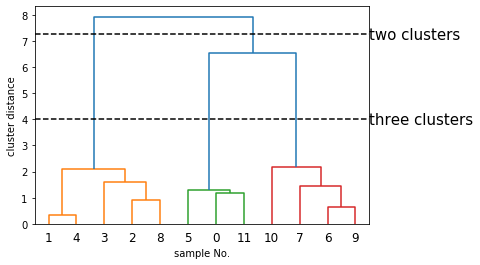

In [36]:
# 덴드로그램(Dendrogram)
from scipy.cluster.hierarchy import dendrogram, ward

X, y = datasets.make_blobs(random_state=0, n_samples=12)  # 12개의 군집

# ward : 분산을 최소화하는 방향으로 클러스터링을 수행한다
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})

plt.xlabel('sample No.')
plt.ylabel('cluster distance')

kmeans 단점 : k를 몇 개로 설정해야하는지

### DBSCAN 
- 클러스터의 개수를 미리 정할 필요가 없다
- 복잡한 형상도 찾을 수 있고, 어떤 클래스도 속하지 않은 포인트를 비교적 잘 구분해낸다
- 단점 : 병합군집과 k-means보다 느리다

#### 방법
- 특성 공간에서 가까이 있는 데이터가 많은, 밀도가 높은 지역의 포인터를 찾는다.
- 데이터 밀집 지역의 한 클러스터를 구성하며,
　 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 아이디어에서 시작
- min_sample 과 eps 두 개의 매개변수 (파라미터)
- 시작할 때 모자이크 포인터 선택

DBSCAN 밀도 기반
Density-based spatial clustering of applications with noise
density 밀집도가 높은 곳

cluster label :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


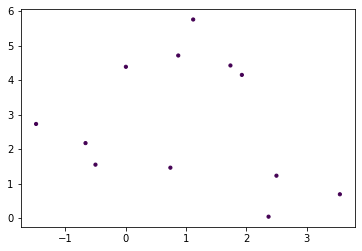

In [54]:
from sklearn.cluster import DBSCAN

X, y = datasets.make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('cluster label : ', clusters)

plt.scatter(X[:,0], X[:,1], c=clusters, marker='o', s=10)
# 1 -> 노이즈. 분류되지않음.

cluster label :  [0 1 1 1 1 0 0 0 1 0 0 0]


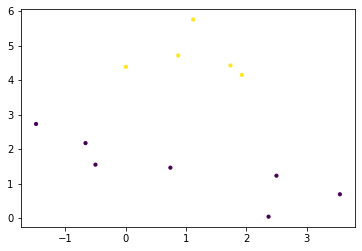

In [55]:
X, y = datasets.make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN(min_samples=2, eps=2)  # min_sample: 최소 묶여있는 개수, eps: 거리
# 거리 2 안에 샘플이 2개 이상 있어야함. 없으면 잡음(1)으로 간주함
clusters2 = dbscan.fit_predict(X)
print('cluster label : ', clusters2)

plt.scatter(X[:,0], X[:,1], c=clusters2, marker='o', s=10)

PCA(Principal Component Analysis) : 주성분 분석
대표적인 차원 축소 알고리즘
고차원-> 저차원. 처리속도도 빨라짐
차원 == 특성(Feature)